In [1]:
#importing packages
import torch, torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt

import copy

In [2]:
# Hyper parameter settings
EPOCH = 10 # Number of times to traverse the data set
BATCH_SIZE = 64 # Batch size (batch_size)
LR = 0.01 # learning rate

In [3]:
# Define the data preprocessing method
transform = transforms.ToTensor()

In [4]:
#Define training and test data set
trainset = torchvision.datasets.MNIST(root='data',train=True,download=False,transform=transform)
testset = torchvision.datasets.MNIST(root='data',train=False,download=False,transform=transform)
 #loading  data with dataloader
trainloader = torch.utils.data.DataLoader(trainset,batch_size=BATCH_SIZE,shuffle=True,)
testloader = torch.utils.data.DataLoader(testset,batch_size=BATCH_SIZE,shuffle=False,)

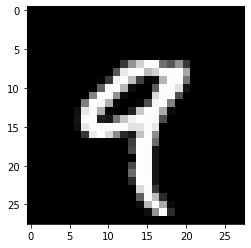

In [5]:
plt.imshow(trainset[4][0][0],cmap="gray")

In [6]:
#define whether to use gpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Alex Network Structure

In [7]:
class AlexNet(nn.Module):
    def __init__(self,width_mult=1):
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, padding=1), # 32*28*28
            nn.MaxPool2d(kernel_size=2, stride=2), # 32*14*14
            nn.ReLU(inplace=True),
            )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1), # 64*14*14
            nn.MaxPool2d(kernel_size=2, stride=2), # 64*7*7
            nn.ReLU(inplace=True),
            )
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1), # 128*7*7
            )
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1), # 256*7*7
            )
 
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 256, kernel_size=3, padding=1), # 256*7*7
            nn.MaxPool2d(kernel_size=3, stride=2), # 256*3*3
            nn.ReLU(inplace=True),
            )
        self.fc1 = nn.Linear(256*3*3, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        x = x.view(-1, 256*3*3)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

In [8]:
# Hyper parameter settings
EPOCH = 5 # Number of times to traverse the data set
BATCH_SIZE = 64 # Batch size (batch_size)
LR = 0.01 # learning rate

In [9]:
def validate(model, data):
    total = 0
    correct = 0
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = net(images)
        value, pred = torch.max(x,1)
        pred = pred.data.cpu()
        total += x.size(0)
        correct += torch.sum(pred == labels)
    return correct*100./total


In [10]:
net = AlexNet().to(device)

In [11]:
# Train and save model parameters
def train():
    # Define loss function loss function and optimization method (using SGD)
    # Cross entropy loss function, usually used formulti-classification problems
    criterion = nn.CrossEntropyLoss() 
    optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)
    max_accuracy=0
    accuracies=[]
    for epoch in range(EPOCH):
                 # Data read
        for i, (images,labels) in enumerate(trainloader):
            images = images.to(device)
            labels = labels.to(device)
                         # Gradient clear
            optimizer.zero_grad()
 
            # forward + backward
            outputs = net(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        accuracy = float(validate(criterion, testloader))
        accuracies.append(accuracy)
        if accuracy > max_accuracy:
            best_model = copy.deepcopy(criterion)
            max_accuracy = accuracy
            print("Saving Best Model with Accuracy: ", accuracy)
        print('Epoch:', epoch+1, "Accuracy :", accuracy, '%')
    plt.plot(accuracies)
    return best_model

In [12]:
alexnet = train()

NameError: name 'copy' is not defined

In [ ]:
def predict_dl(model, data):
    y_pred = []
    y_true = []
    for i, (images, labels) in enumerate(data):
        images = images.cuda()
        x = model(images)
        value, pred = torch.max(x, 1)
        pred = pred.data.cpu()
        y_pred.extend(list(pred.numpy()))
        y_true.extend(list(labels.numpy()))
    return np.array(y_pred), np.array(y_true)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred, y_true = predict_dl(lenet, val_dl)

In [ ]:
pd.DataFrame(confusion_matrix(y_true, y_pred, labels=np.arange(0,10)))

In [ ]:
from io import BytesIO
import requests
from PIL import Image

In [ ]:
#inference
def inference(path, model, device):
    r = requests.get(path)
    with BytesIO(r.content) as f:
        img = Image.open(f).convert(mode="L")
        img = img.resize((28, 28))
        x = (255 - np.expand_dims(np.array(img), -1))/255.
    with torch.no_grad():
        pred = model(torch.unsqueeze(T(x), axis=0).float().to(device))
        return F.softmax(pred, dim=-1).cpu().numpy()

In [ ]:
path = "https://previews.123rf.com/images/aroas/aroas1704/aroas170400068/79321959-handwritten-sketch-black-number-8-on-white-background.jpg"
r = requests.get(path)
with BytesIO(r.content) as f:
    img = Image.open(f).convert(mode="L")
    img = img.resize((28, 28))
x = (255 - np.expand_dims(np.array(img), -1))/255.

In [ ]:
plt.imshow(x.squeeze(-1), cmap="gray")

In [ ]:
#prediction
pred = inference(path, lenet, device=device)
pred_idx = np.argmax(pred)
print(f"Predicted: {pred_idx}, Prob: {pred[0][pred_idx]*100} %")

In [ ]:
pred